# Bond Enzyme Models

In [2]:
latex.add_to_preamble(r"\usepackage{amsmath}")
from matplotlib import rc
rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{amsmath}')
from contextlib import contextmanager
import sys, os

@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:  
            yield
        finally:
            sys.stdout = old_stdout
            
            
import warnings
            
@contextmanager
def suppress_warnings():
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        yield
        
sys.path.insert(0, "/home/twright/Documents/PhD/Notebooks")

In [3]:
from lbuc.bondcalculus import *

In [4]:
m = BondModel("/home/twright/Documents/PhD/Notebooks/models/enzyme.bond"); m

Running cmd: 'load "/home/twright/Documents/PhD/Notebooks/models/enzyme.bond"' ...


## Initial exploration

In [5]:
p = BondProcess("Pi4 || [0.5 .. 0.6] E", m); p

BondProcess('Pi4 || [0.5 .. 0.6] E', <lbuc.bondcalculus.BondModel object at 0x7fab8c23c220>)

In [6]:
s = p.as_system; s

Running cmd: 'savesage "Pi4 || [0.5 .. 0.6] E" "/tmp/bond-sage-script-9n48lcu1.py"' ...


System(R, (x0, x1, x2, x3), [1, 0, [0.59999999999999997 .. 0.70000000000000018], 0], (-1.?*x0*x2, 0.50000000000000000?*x3, -1.?*x0*x2 + 0.50000000000000000?*x3, 1.?*x0*x2 - 0.50000000000000000?*x3), varmap=bidict({'S': x0, 'P': x1, 'E': x2, 'new 0 in p@0->P | x@0->E': x3}))

In [7]:
r = s.reach(4); r.successful

True

/usr/lib64/python3.8/site-packages/numpy/core/getlimits.py:400: UserWarning: Signature b'\x99\x99\x99\x99\x99\x99\xb9\xbf' for <class 'numpy.float64'> does not match any known type: falling back to type probe function
  machar = _get_machar(dtype)


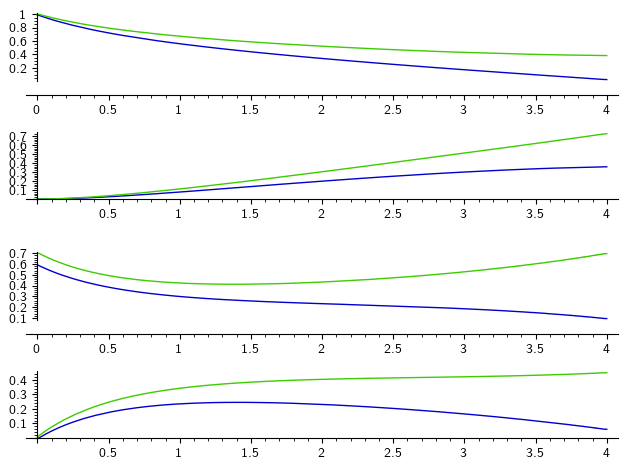

In [8]:
with suppress_stdout():
    res = graphics_array([r.sage_plot(x) for x in s.x], len(s.x), 1)
res

In [9]:
s.varmap

bidict({'S': x0, 'P': x1, 'E': x2, 'new 0 in p@0->P | x@0->E': x3})

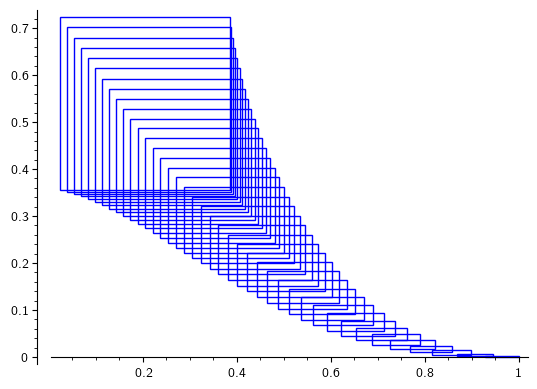

In [10]:
with suppress_stdout():
    res = r.sage_interval_plot('x0', 'x1')
res

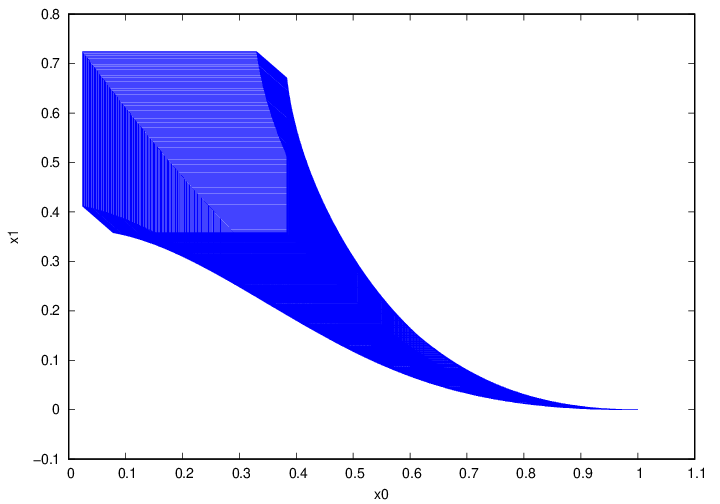

In [11]:
r.wplot("x0", "x1")

In [12]:
from lbuc.logic import *

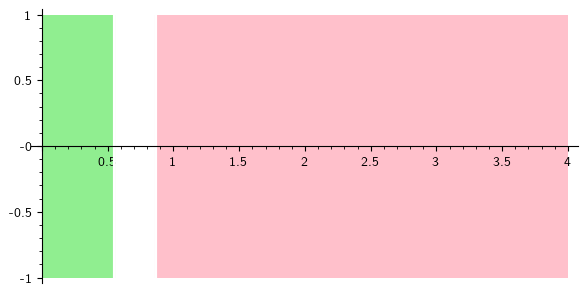

In [13]:
with suppress_stdout(): 
    sig = Atomic(var('S') - 0.7).signal_for_system(s, 4)
sig.plot()

In [14]:
sigC = G(RIF(0,0.2), "[0 .. 10] E" >> Atomic(var('S') - 0.7)).signal_for_system(s, 4)
sigC

Running cmd: 'savesage "([1] S || [1] P || [1] E || [1] new 0 in p@0->P | x@0->E || { e || s at rate MA([0.9999999999999999 .. 1.1]); r|x at rate MA([9.999999999999999e-2 .. 0.1]); p|x at rate MA(0.5); }) || ([0 .. 10] E)" "/tmp/bond-sage-script-vrj_yusp.py"' ...
phi variables sfs = {x0, x3, x1, x2}
system sfs = System(R, (x0, x1, x2, x3), [1, 0, [0.59999999999999997 .. 0.70000000000000018], 0], (-1.?*x0*x2, 0.50000000000000000?*x3, -1.?*x0*x2 + 0.50000000000000000?*x3, 1.?*x0*x2 - 0.50000000000000000?*x3), varmap=bidict({'S': x0, 'P': x1, 'E': x2, 'new 0 in p@0->P | x@0->E': x3}))
Computed 96 flowpipes in 7.849306116026128 sec
In G.signal
mask = None
phi variables sfs = {x0}
system sfs = System(R, (x0, x1, x2, x3), [0, 0, [0 .. 10], 0], (-1.?*x0*x2, x3, -1.?*x0*x2 + x3, 1.?*x0*x2 - x3), varmap=bidict({'S': x0, 'P': x1, 'E': x2, 'new 0 in p@0->P | x@0->E': x3}))
phi variables sfs = {x0}
system sfs = System(R, (x0, x1, x2, x3), [0, 0, [0 .. 10], 0], (-1.?*x0*x2, x3, -1.?*x0*x2 + x3, 1.?

Signal([0.0000000000000000 .. 4.0000000000000000], [([0.26262500000000005 .. 0.32525000000000010], True), ([0.85050000000000025 .. 4.0000000000000000], False)], mask=None)

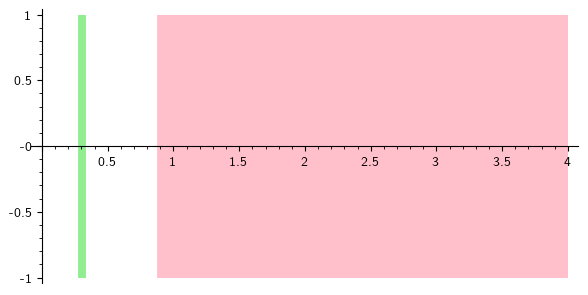

In [15]:
sigC.plot()

In [16]:
sigC = G(RIF(0,0.2), "[0 .. 10] E" >> Atomic(var('S') - 0.7)).signal_for_system(s, 4,
    symbolic_composition=True, use_masks=True)
sigC

Running cmd: 'savesage "([1] S || [1] P || [1] E || [1] new 0 in p@0->P | x@0->E || { e || s at rate MA([0.9999999999999999 .. 1.1]); r|x at rate MA([9.999999999999999e-2 .. 0.1]); p|x at rate MA(0.5); }) || ([0 .. 10] E)" "/tmp/bond-sage-script-lzpwbvi1.py"' ...
phi variables sfs = {x0, x3, x1, x2}
system sfs = System(R, (x0, x1, x2, x3), [1, 0, [0.59999999999999997 .. 0.70000000000000018], 0], (-1.?*x0*x2, 0.50000000000000000?*x3, -1.?*x0*x2 + 0.50000000000000000?*x3, 1.?*x0*x2 - 0.50000000000000000?*x3), varmap=bidict({'S': x0, 'P': x1, 'E': x2, 'new 0 in p@0->P | x@0->E': x3}))
Computed 96 flowpipes in 8.01454370803549 sec
In G.signal
mask = Mask([0.0000000000000000 .. 4.2020000000000009], [[0.0000000000000000 .. 4.2020000000000009]])
mask = Mask([0.0000000000000000 .. 4.2020000000000009], [[0.0000000000000000 .. 4.2020000000000009]])
phi variables sfs = {x0}
system sfs = System(R, (x0, x1, x2, x3), [0, 0, [0 .. 10], 0], (-1.?*x0*x2, x3, -1.?*x0*x2 + x3, 1.?*x0*x2 - x3), varmap=bid

Signal([0.0000000000000000 .. 4.0000000000000000], [([0.26262500000000005 .. 0.32525000000000010], True), ([0.85050000000000025 .. 4.0000000000000000], False)], mask=Mask([0.0000000000000000 .. 4.0000000000000000], [[0.0000000000000000 .. 4.0000000000000000]]))

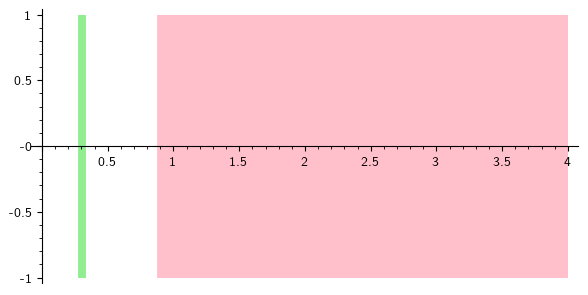

In [17]:
sigC.plot()

## Base model

In [18]:
p = BondProcess("Pi4", m); p

BondProcess('Pi4', <lbuc.bondcalculus.BondModel object at 0x7fab8c23c220>)

In [19]:
s = p.as_system

Running cmd: 'savesage "Pi4" "/tmp/bond-sage-script-j_ylbes0.py"' ...


In [20]:
r = s.reach(4); r.successful

True

In [21]:
def plot_proc(Pi, n=4, order=10, **kwargs):
    p = BondProcess(Pi, m)
    s = p.as_system
    r = s.reach(n, order=order, symbolic_composition=1, **kwargs)
    assert r.successful
    color_schemes = ('blue', 'green', 'orange', 'red', 'purple') 
    return sum((Atomic(x).sage_plot(r, color_scheme=cs) for x, cs in zip(s.x, color_schemes)),
               Graphics())

var_names = [b'local_t', b'x0', b'x1', b'x2', b'x3']
res = b'(([1.0000000000 , 1.0000000000] * x0))'
PolyObserver((([1.0000000000 , 1.0000000000] * x0)), <flowstar.reachability.Reach object at 0x7fab7cc0eb80>, None, symbolic_composition=False, symbolic_composition_order=-1, tentative_unpreconditioning=False, mask=None)
plot_points = 400
var_names = [b'local_t', b'x0', b'x1', b'x2', b'x3']
res = b'(([1.0000000000 , 1.0000000000] * x1))'
PolyObserver((([1.0000000000 , 1.0000000000] * x1)), <flowstar.reachability.Reach object at 0x7fab7cc0eb80>, None, symbolic_composition=False, symbolic_composition_order=-1, tentative_unpreconditioning=False, mask=None)
plot_points = 400
var_names = [b'local_t', b'x0', b'x1', b'x2', b'x3']
res = b'(([1.0000000000 , 1.0000000000] * x2))'
PolyObserver((([1.0000000000 , 1.0000000000] * x2)), <flowstar.reachability.Reach object at 0x7fab7cc0eb80>, None, symbolic_composition=False, symbolic_composition_order=-1, tentative_unpreconditioning=False, mask=None)
p

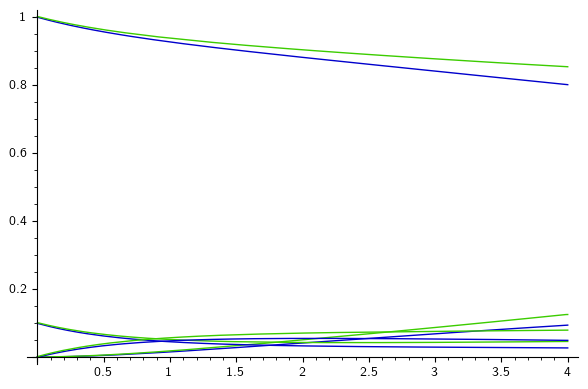

In [22]:
sum((r.sage_plot(x) for x in s.x), Graphics())

Running cmd: 'savesage "Pi4" "/tmp/bond-sage-script-utru_g7t.py"' ...
PolyObserver(x0, <flowstar.reachability.Reach object at 0x7fab7cee1a60>, -1.?*x0*x2, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = -1.?*x0*x2
PolyObserver(x1, <flowstar.reachability.Reach object at 0x7fab7cee1a60>, 0.50000000000000000?*x3, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = 0.50000000000000000?*x3
PolyObserver(x2, <flowstar.reachability.Reach object at 0x7fab7cee1a60>, -1.?*x0*x2 + 0.50000000000000000?*x3, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = -1.?*x0*x2 + 0.50000000000000000?*x3
PolyObserver(x3, <flowstar.reachability.Reach object at 0x7fab7cee1a60>, 1.?*x0*x2 - 0.50000000000000000?*x3, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = 1.

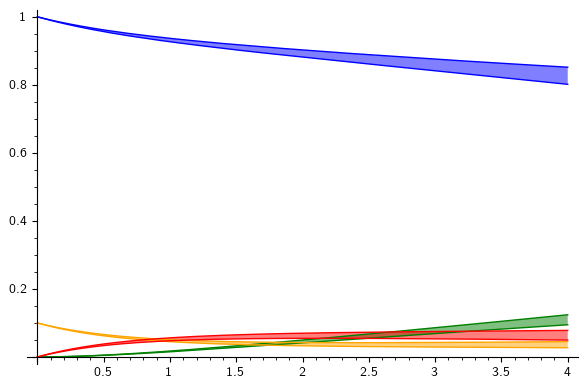

In [23]:
plot_proc("Pi4")

Running cmd: 'savesage "Pi1" "/tmp/bond-sage-script-kn56ehxz.py"' ...
PolyObserver(x0, <flowstar.reachability.Reach object at 0x7fab7cee1a60>, -x0*x2, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = -x0*x2
PolyObserver(x1, <flowstar.reachability.Reach object at 0x7fab7cee1a60>, 0.50000000000000000?*x3, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = 0.50000000000000000?*x3
PolyObserver(x2, <flowstar.reachability.Reach object at 0x7fab7cee1a60>, -x0*x2 + 0.50000000000000000?*x3, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = -x0*x2 + 0.50000000000000000?*x3
PolyObserver(x3, <flowstar.reachability.Reach object at 0x7fab7cee1a60>, x0*x2 - 0.50000000000000000?*x3, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = x0*x2 - 0.500000000000

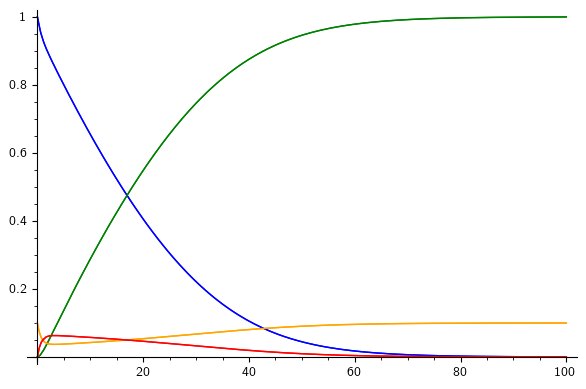

In [24]:
plot_proc("Pi1", n=100)

Running cmd: 'savesage "[0.1] E || [1.0] S with network M1(1.0, 0.1, 0.5)" "/tmp/bond-sage-script-c2vx9s0f.py"' ...
PolyObserver(x0, <flowstar.reachability.Reach object at 0x7fab7cee1700>, -x0*x2, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = -x0*x2
PolyObserver(x1, <flowstar.reachability.Reach object at 0x7fab7cee1700>, 0.50000000000000000?*x3, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = 0.50000000000000000?*x3
PolyObserver(x2, <flowstar.reachability.Reach object at 0x7fab7cee1700>, -x0*x2 + 0.50000000000000000?*x3, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = -x0*x2 + 0.50000000000000000?*x3
PolyObserver(x3, <flowstar.reachability.Reach object at 0x7fab7cee1700>, x0*x2 - 0.50000000000000000?*x3, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=Tr

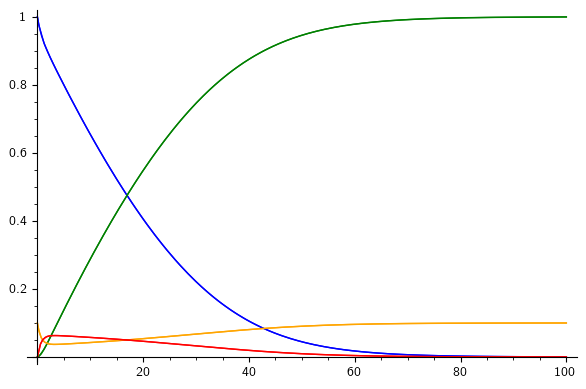

In [25]:
plot_proc("[0.1] E || [1.0] S with network M1(1.0, 0.1, 0.5)", n=100)

Running cmd: 'savesage "[0.1] Em || [1.0] Sm with network UAF2(1.0, 0.1, 0.5, 0)" "/tmp/bond-sage-script-3doiluzz.py"' ...
str_odes = ['((x1)*(x2)*([0.500000000000000, 0.500000000000000]))/(x2 + [0.599999999999999, 0.600000000000001])', '[0.000000000000000, 0.000000000000000]', '((x1)*(x2)*([-0.500000000000000, -0.500000000000000]))/(x2 + [0.599999999999999, 0.600000000000001])']
crude_roots = False
SageObserver(x0, <flowstar.reachability.Reach object at 0x7fab7cbd4820>, 0.500000000000000*x1*x2/(x2 + 0.600000000000000?), symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
make_interval_fn with f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7fab7f056540>
make_interval_fn with f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7fab7f056640>
args = [0.?e-15, 0.10000000000000001?, 1.000000000000000?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7fab7f056540>
y_py = 0.?e-15
args = [0.0162977031460?, 0.10000000000000001?, 0.9837022

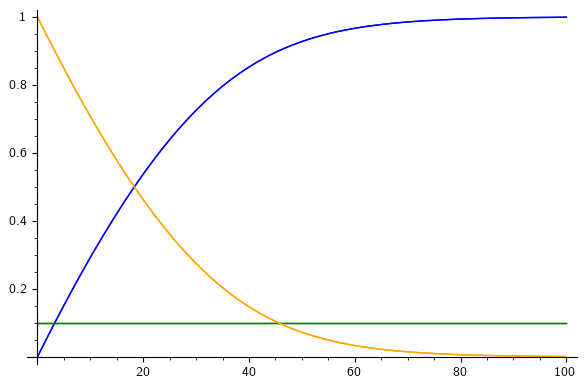

In [26]:
plot_proc("[0.1] Em || [1.0] Sm with network UAF2(1.0, 0.1, 0.5, 0)", n=100)

Running cmd: 'savesage "[1.0] E || [1.0] S with network M1(1.0, 0.1, 0.5)" "/tmp/bond-sage-script-kou801z_.py"' ...
PolyObserver(x0, <flowstar.reachability.Reach object at 0x7fab7cbd4820>, -x0*x2, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = -x0*x2
PolyObserver(x1, <flowstar.reachability.Reach object at 0x7fab7cbd4820>, 0.50000000000000000?*x3, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = 0.50000000000000000?*x3
PolyObserver(x2, <flowstar.reachability.Reach object at 0x7fab7cbd4820>, -x0*x2 + 0.50000000000000000?*x3, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = -x0*x2 + 0.50000000000000000?*x3
PolyObserver(x3, <flowstar.reachability.Reach object at 0x7fab7cbd4820>, x0*x2 - 0.50000000000000000?*x3, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=Tr

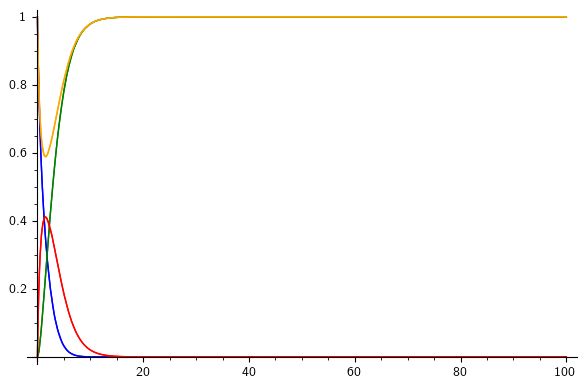

In [27]:
plot_proc("[1.0] E || [1.0] S with network M1(1.0, 0.1, 0.5)", n=100)

## Uncertain initial conditions

Running cmd: 'savesage "[1.0] E || [1.0] S with network M1(1.0, 0.1, 0.5)" "/tmp/bond-sage-script-w5ximcpw.py"' ...
PolyObserver(x0, <flowstar.reachability.Reach object at 0x7fab7cbd4820>, -x0*x2, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = -x0*x2
PolyObserver(x1, <flowstar.reachability.Reach object at 0x7fab7cbd4820>, 0.50000000000000000?*x3, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = 0.50000000000000000?*x3
PolyObserver(x2, <flowstar.reachability.Reach object at 0x7fab7cbd4820>, -x0*x2 + 0.50000000000000000?*x3, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = -x0*x2 + 0.50000000000000000?*x3
PolyObserver(x3, <flowstar.reachability.Reach object at 0x7fab7cbd4820>, x0*x2 - 0.50000000000000000?*x3, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=Tr

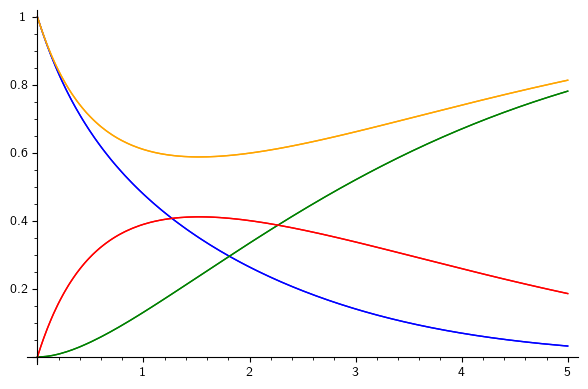

In [28]:
plot_proc("[1.0] E || [1.0] S with network M1(1.0, 0.1, 0.5)", n=5)

Running cmd: 'savesage "[0.9, 1.1] E || [1.0] S with network M1(1.0, 0.1, 0.5)" "/tmp/bond-sage-script-3klt3n8g.py"' ...
PolyObserver(x0, <flowstar.reachability.Reach object at 0x7fab7cbd4700>, -x0*x2, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = -x0*x2
PolyObserver(x1, <flowstar.reachability.Reach object at 0x7fab7cbd4700>, 0.50000000000000000?*x3, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = 0.50000000000000000?*x3
PolyObserver(x2, <flowstar.reachability.Reach object at 0x7fab7cbd4700>, -x0*x2 + 0.50000000000000000?*x3, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = -x0*x2 + 0.50000000000000000?*x3
PolyObserver(x3, <flowstar.reachability.Reach object at 0x7fab7cbd4700>, x0*x2 - 0.50000000000000000?*x3, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioni

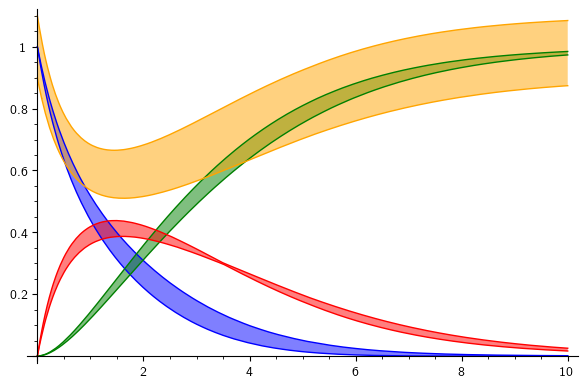

In [29]:
plot_proc("[0.9, 1.1] E || [1.0] S with network M1(1.0, 0.1, 0.5)", n=10)

Running cmd: 'savesage "[0.1, 0.12] E || [1.0] S with network M1(1.0, 0.1, 0.5)" "/tmp/bond-sage-script-o0glc14l.py"' ...
PolyObserver(x0, <flowstar.reachability.Reach object at 0x7fab7cbd4700>, -x0*x2, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = -x0*x2
PolyObserver(x1, <flowstar.reachability.Reach object at 0x7fab7cbd4700>, 0.50000000000000000?*x3, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = 0.50000000000000000?*x3
PolyObserver(x2, <flowstar.reachability.Reach object at 0x7fab7cbd4700>, -x0*x2 + 0.50000000000000000?*x3, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = -x0*x2 + 0.50000000000000000?*x3
PolyObserver(x3, <flowstar.reachability.Reach object at 0x7fab7cbd4700>, x0*x2 - 0.50000000000000000?*x3, symbolic_composition=False, symbolic_composition_order=10, tentative_unprecondition

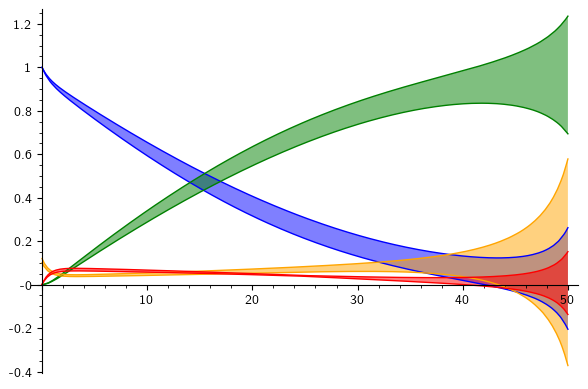

In [30]:
plot_proc("[0.1, 0.12] E || [1.0] S with network M1(1.0, 0.1, 0.5)", n=50)

Running cmd: 'savesage "[0.11] E || [1.0] S with network M1(1.0, 0.1, 0.5)" "/tmp/bond-sage-script-2zm9t9x6.py"' ...
PolyObserver(x0, <flowstar.reachability.Reach object at 0x7fab7cbd4b80>, -x0*x2, symbolic_composition=False, symbolic_composition_order=8, tentative_unpreconditioning=True, mask=None)
fprime = -x0*x2
PolyObserver(x1, <flowstar.reachability.Reach object at 0x7fab7cbd4b80>, 0.50000000000000000?*x3, symbolic_composition=False, symbolic_composition_order=8, tentative_unpreconditioning=True, mask=None)
fprime = 0.50000000000000000?*x3
PolyObserver(x2, <flowstar.reachability.Reach object at 0x7fab7cbd4b80>, -x0*x2 + 0.50000000000000000?*x3, symbolic_composition=False, symbolic_composition_order=8, tentative_unpreconditioning=True, mask=None)
fprime = -x0*x2 + 0.50000000000000000?*x3
PolyObserver(x3, <flowstar.reachability.Reach object at 0x7fab7cbd4b80>, x0*x2 - 0.50000000000000000?*x3, symbolic_composition=False, symbolic_composition_order=8, tentative_unpreconditioning=True,

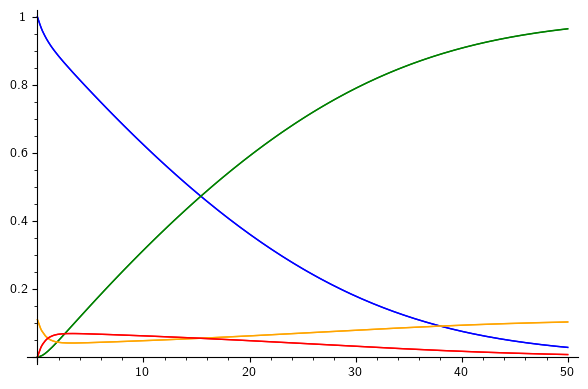

In [31]:
p = plot_proc("[0.11] E || [1.0] S with network M1(1.0, 0.1, 0.5)", n=50,
         order=8, step=0.2)
p.show()
p.save("images/enzyme-simple.pdf")

Running cmd: 'savesage "[0.1, 0.12] E || [1.0] S with network M1(1.0, 0.1, 0.5)" "/tmp/bond-sage-script-tcc_bcsh.py"' ...
PolyObserver(x0, <flowstar.reachability.Reach object at 0x7fab7cee1820>, -x0*x2, symbolic_composition=False, symbolic_composition_order=8, tentative_unpreconditioning=True, mask=None)
fprime = -x0*x2
PolyObserver(x1, <flowstar.reachability.Reach object at 0x7fab7cee1820>, 0.50000000000000000?*x3, symbolic_composition=False, symbolic_composition_order=8, tentative_unpreconditioning=True, mask=None)
fprime = 0.50000000000000000?*x3
PolyObserver(x2, <flowstar.reachability.Reach object at 0x7fab7cee1820>, -x0*x2 + 0.50000000000000000?*x3, symbolic_composition=False, symbolic_composition_order=8, tentative_unpreconditioning=True, mask=None)
fprime = -x0*x2 + 0.50000000000000000?*x3
PolyObserver(x3, <flowstar.reachability.Reach object at 0x7fab7cee1820>, x0*x2 - 0.50000000000000000?*x3, symbolic_composition=False, symbolic_composition_order=8, tentative_unpreconditioning=

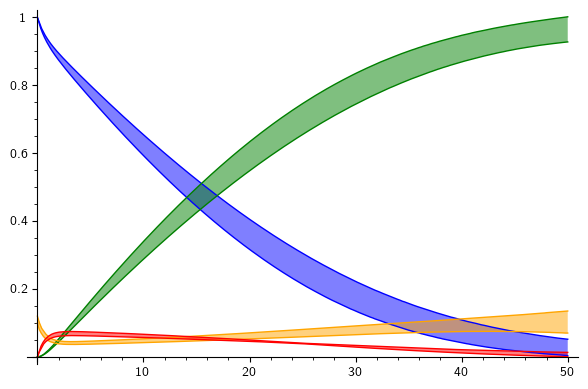

In [32]:
p = plot_proc("[0.1, 0.12] E || [1.0] S with network M1(1.0, 0.1, 0.5)", n=50,
         order=8, step=0.2)
p.show()
p.save("images/enzyme-uncertain-initial.pdf")

In [33]:
from flowstar.reachability import IntegrationMethod

In [34]:
help(IntegrationMethod)

Help on class IntegrationMethod in module flowstar.reachability:

class IntegrationMethod(enum.IntEnum)
 |  IntegrationMethod(value, names=None, *, module=None, qualname=None, type=None, start=1)
 |  
 |  An enumeration.
 |  
 |  Method resolution order:
 |      IntegrationMethod
 |      enum.IntEnum
 |      builtins.int
 |      enum.Enum
 |      builtins.object
 |  
 |  Data and other attributes defined here:
 |  
 |  HIGH_DEGREE = <IntegrationMethod.HIGH_DEGREE: 3>
 |  
 |  LOW_DEGREE = <IntegrationMethod.LOW_DEGREE: 2>
 |  
 |  LTI = <IntegrationMethod.LTI: 5>
 |  
 |  LTV = <IntegrationMethod.LTV: 6>
 |  
 |  NONPOLY_TAYLOR = <IntegrationMethod.NONPOLY_TAYLOR: 4>
 |  
 |  NONPOLY_TAYLOR_SYMB = <IntegrationMethod.NONPOLY_TAYLOR_SYMB: 8>
 |  
 |  ONLY_PICARD = <IntegrationMethod.ONLY_PICARD: 1>
 |  
 |  ONLY_PICARD_SYMB = <IntegrationMethod.ONLY_PICARD_SYMB: 7>
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors inherited from enum.Enu

Running cmd: 'savesage "[0.1] E || [1.0] S with network M1([1.0 .. 1.01], 0.1, 0.5)" "/tmp/bond-sage-script-rqfqrshv.py"' ...
PolyObserver(x0, <flowstar.reachability.Reach object at 0x7fab70814700>, -1.0?*x0*x2, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = -1.0?*x0*x2
PolyObserver(x1, <flowstar.reachability.Reach object at 0x7fab70814700>, 0.50000000000000000?*x3, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = 0.50000000000000000?*x3
PolyObserver(x2, <flowstar.reachability.Reach object at 0x7fab70814700>, -1.0?*x0*x2 + 0.50000000000000000?*x3, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = -1.0?*x0*x2 + 0.50000000000000000?*x3
PolyObserver(x3, <flowstar.reachability.Reach object at 0x7fab70814700>, 1.0?*x0*x2 - 0.50000000000000000?*x3, symbolic_composition=False, symbolic_composition_order

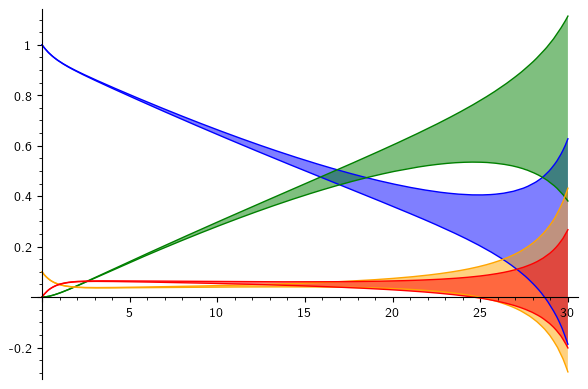

In [35]:
plot_proc("[0.1] E || [1.0] S with network M1([1.0 .. 1.01], 0.1, 0.5)", n=30,
         order=10, step=0.01)

Running cmd: 'savesage "[0.1] E || [1.0] S with network M1([1.0 .. 1.01], 0.1, 0.5)" "/tmp/bond-sage-script-z8znxm1z.py"' ...
PolyObserver(x0, <flowstar.reachability.Reach object at 0x7fab7cbd4940>, -1.0?*x0*x2, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = -1.0?*x0*x2
PolyObserver(x1, <flowstar.reachability.Reach object at 0x7fab7cbd4940>, 0.50000000000000000?*x3, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = 0.50000000000000000?*x3
PolyObserver(x2, <flowstar.reachability.Reach object at 0x7fab7cbd4940>, -1.0?*x0*x2 + 0.50000000000000000?*x3, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = -1.0?*x0*x2 + 0.50000000000000000?*x3
PolyObserver(x3, <flowstar.reachability.Reach object at 0x7fab7cbd4940>, 1.0?*x0*x2 - 0.50000000000000000?*x3, symbolic_composition=False, symbolic_composition_order

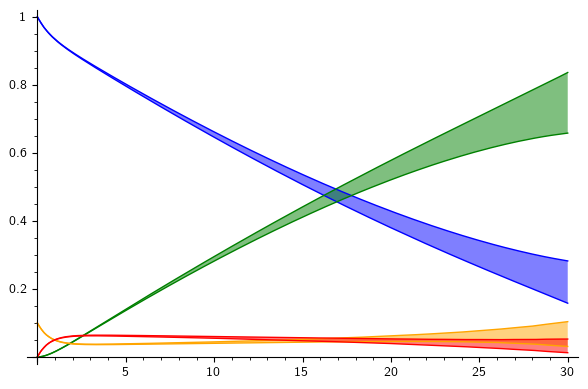

In [36]:
plot_proc("[0.1] E || [1.0] S with network M1([1.0 .. 1.01], 0.1, 0.5)", n=30,
         order=10, step=0.01,
          integration_method=IntegrationMethod.ONLY_PICARD_SYMB)

Running cmd: 'savesage "[0.1] E || [1.0] S with network M1([1.0 .. 1.01], 0.1, 0.5)" "/tmp/bond-sage-script-g8zwjj87.py"' ...
PolyObserver(x0, <flowstar.reachability.Reach object at 0x7fab7cee1700>, -1.0?*x0*x2, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = -1.0?*x0*x2
PolyObserver(x1, <flowstar.reachability.Reach object at 0x7fab7cee1700>, 0.50000000000000000?*x3, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = 0.50000000000000000?*x3
PolyObserver(x2, <flowstar.reachability.Reach object at 0x7fab7cee1700>, -1.0?*x0*x2 + 0.50000000000000000?*x3, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = -1.0?*x0*x2 + 0.50000000000000000?*x3
PolyObserver(x3, <flowstar.reachability.Reach object at 0x7fab7cee1700>, 1.0?*x0*x2 - 0.50000000000000000?*x3, symbolic_composition=False, symbolic_composition_order

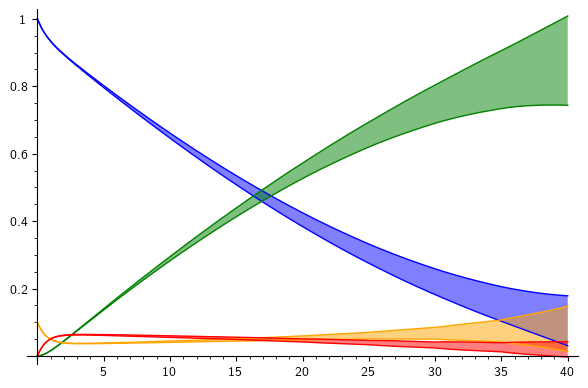

In [37]:
plot_proc("[0.1] E || [1.0] S with network M1([1.0 .. 1.01], 0.1, 0.5)",
          n=40, order=10, step=0.01,
          integration_method=IntegrationMethod.ONLY_PICARD_SYMB,
          max_remainder_queue=500)

In [38]:
p = plot_proc("[0.1] E || [1.0] S with network M1([1.0 .. 1.01], 0.1, 0.5)",
          n=50, order=10, step=0.03,
          integration_method=IntegrationMethod.ONLY_PICARD_SYMB,
          max_remainder_queue=500)


Running cmd: 'savesage "[0.1] E || [1.0] S with network M1([1.0 .. 1.01], 0.1, 0.5)" "/tmp/bond-sage-script-1yshmms2.py"' ...
PolyObserver(x0, <flowstar.reachability.Reach object at 0x7fab7cee1700>, -1.0?*x0*x2, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = -1.0?*x0*x2
PolyObserver(x1, <flowstar.reachability.Reach object at 0x7fab7cee1700>, 0.50000000000000000?*x3, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = 0.50000000000000000?*x3
PolyObserver(x2, <flowstar.reachability.Reach object at 0x7fab7cee1700>, -1.0?*x0*x2 + 0.50000000000000000?*x3, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = -1.0?*x0*x2 + 0.50000000000000000?*x3
PolyObserver(x3, <flowstar.reachability.Reach object at 0x7fab7cee1700>, 1.0?*x0*x2 - 0.50000000000000000?*x3, symbolic_composition=False, symbolic_composition_order

In [39]:
p = plot_proc("[0.1] E || [1.0] S with network M1([1.0 .. 1.01], 0.1, 0.5)",
          n=50, order=10, step=0.05,
          integration_method=IntegrationMethod.ONLY_PICARD_SYMB,
          max_remainder_queue=500)

Running cmd: 'savesage "[0.1] E || [1.0] S with network M1([1.0 .. 1.01], 0.1, 0.5)" "/tmp/bond-sage-script-0dpp_ofz.py"' ...
PolyObserver(x0, <flowstar.reachability.Reach object at 0x7fab7cee1700>, -1.0?*x0*x2, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = -1.0?*x0*x2
PolyObserver(x1, <flowstar.reachability.Reach object at 0x7fab7cee1700>, 0.50000000000000000?*x3, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = 0.50000000000000000?*x3
PolyObserver(x2, <flowstar.reachability.Reach object at 0x7fab7cee1700>, -1.0?*x0*x2 + 0.50000000000000000?*x3, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = -1.0?*x0*x2 + 0.50000000000000000?*x3
PolyObserver(x3, <flowstar.reachability.Reach object at 0x7fab7cee1700>, 1.0?*x0*x2 - 0.50000000000000000?*x3, symbolic_composition=False, symbolic_composition_order

Running cmd: 'savesage "[0.1] E || [1.0] S with network M1([1.0 .. 1.02], 0.1, 0.5)" "/tmp/bond-sage-script-rf8n2yiv.py"' ...
PolyObserver(x0, <flowstar.reachability.Reach object at 0x7fab70814700>, -1.0?*x0*x2, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = -1.0?*x0*x2
PolyObserver(x1, <flowstar.reachability.Reach object at 0x7fab70814700>, 0.50000000000000000?*x3, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = 0.50000000000000000?*x3
PolyObserver(x2, <flowstar.reachability.Reach object at 0x7fab70814700>, -1.0?*x0*x2 + 0.50000000000000000?*x3, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = -1.0?*x0*x2 + 0.50000000000000000?*x3
PolyObserver(x3, <flowstar.reachability.Reach object at 0x7fab70814700>, 1.0?*x0*x2 - 0.50000000000000000?*x3, symbolic_composition=False, symbolic_composition_order

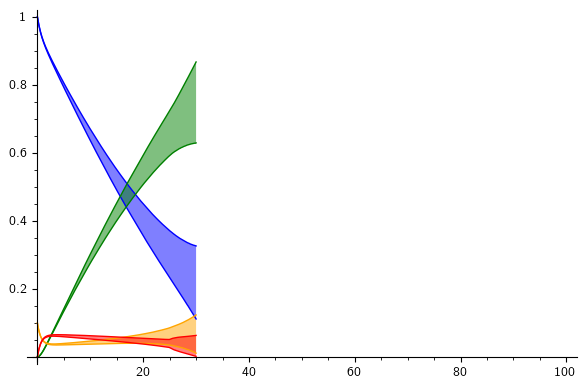

In [40]:
p = plot_proc("[0.1] E || [1.0] S with network M1([1.0 .. 1.02], 0.1, 0.5)",
          n=30, order=10, step=0.05,
          integration_method=IntegrationMethod.ONLY_PICARD_SYMB,
          max_remainder_queue=500)
p.xmax(100)
p

Running cmd: 'savesage "[0.1] E || [1.0] S with network M1([1.0 .. 1.05], 0.1, 0.5)" "/tmp/bond-sage-script-qp2esdyw.py"' ...
PolyObserver(x0, <flowstar.reachability.Reach object at 0x7efb1cf6a700>, -1.0?*x0*x2, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = -1.0?*x0*x2
PolyObserver(x1, <flowstar.reachability.Reach object at 0x7efb1cf6a700>, 0.50000000000000000?*x3, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = 0.50000000000000000?*x3
PolyObserver(x2, <flowstar.reachability.Reach object at 0x7efb1cf6a700>, -1.0?*x0*x2 + 0.50000000000000000?*x3, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = -1.0?*x0*x2 + 0.50000000000000000?*x3
PolyObserver(x3, <flowstar.reachability.Reach object at 0x7efb1cf6a700>, 1.0?*x0*x2 - 0.50000000000000000?*x3, symbolic_composition=False, symbolic_composition_order

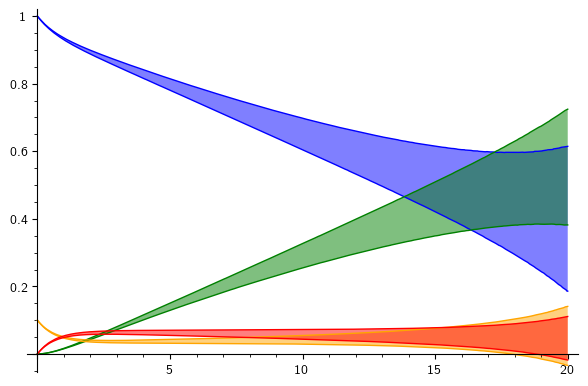

In [40]:
plot_proc("[0.1] E || [1.0] S with network M1([1.0 .. 1.05], 0.1, 0.5)",
          n=20, order=10, step=0.05,
          integration_method=IntegrationMethod.ONLY_PICARD_SYMB,
          max_remainder_queue=500)

Running cmd: 'savesage "[0.1] E || [1.0] S with network M1([1.0 .. 1.1], 0.1, 0.5)" "/tmp/bond-sage-script-g7ohs9x0.py"' ...
PolyObserver(x0, <flowstar.reachability.Reach object at 0x7efb1cf6a700>, -1.?*x0*x2, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = -1.?*x0*x2
PolyObserver(x1, <flowstar.reachability.Reach object at 0x7efb1cf6a700>, 0.50000000000000000?*x3, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = 0.50000000000000000?*x3
PolyObserver(x2, <flowstar.reachability.Reach object at 0x7efb1cf6a700>, -1.?*x0*x2 + 0.50000000000000000?*x3, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = -1.?*x0*x2 + 0.50000000000000000?*x3
PolyObserver(x3, <flowstar.reachability.Reach object at 0x7efb1cf6a700>, 1.?*x0*x2 - 0.50000000000000000?*x3, symbolic_composition=False, symbolic_composition_order=10, t

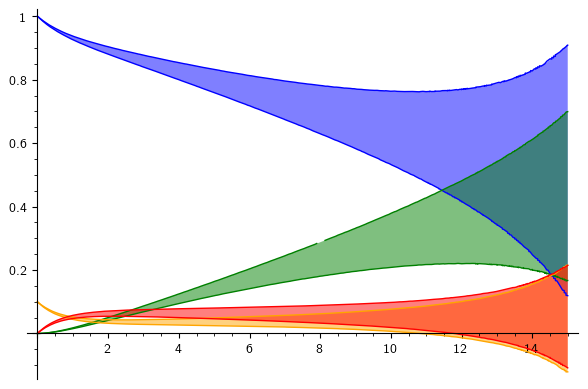

In [41]:
plot_proc("[0.1] E || [1.0] S with network M1([1.0 .. 1.1], 0.1, 0.5)",
          n=15, order=10, step=0.05,
          integration_method=IntegrationMethod.ONLY_PICARD_SYMB,
          max_remainder_queue=500)

Running cmd: 'savesage "[0.1] E || [1.0] S || [1.0 .. 1.1] K with network M1sep(0.1, 0.5)" "/tmp/bond-sage-script-7x8blqpr.py"' ...
PolyObserver(x0, <flowstar.reachability.Reach object at 0x7efb076f43a0>, -x0*x2*x3, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = -x0*x2*x3
PolyObserver(x1, <flowstar.reachability.Reach object at 0x7efb076f43a0>, 0.50000000000000000?*x4, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = 0.50000000000000000?*x4
PolyObserver(x2, <flowstar.reachability.Reach object at 0x7efb076f43a0>, -x0*x2*x3 + 0.50000000000000000?*x4, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = -x0*x2*x3 + 0.50000000000000000?*x4
PolyObserver(x3, <flowstar.reachability.Reach object at 0x7efb076f43a0>, 0, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True

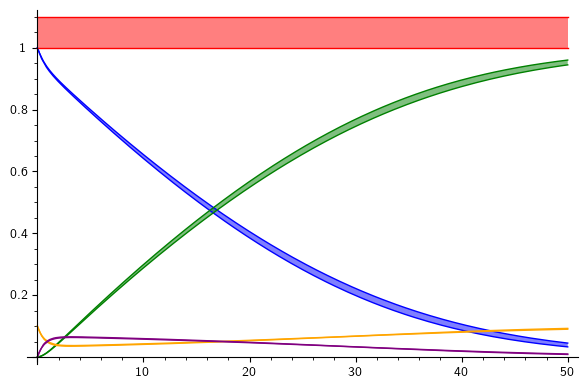

In [56]:
p = plot_proc("[0.1] E || [1.0] S || [1.0 .. 1.1] K with network M1sep(0.1, 0.5)",
          n=50, order=10, step=0.05,
          integration_method=IntegrationMethod.ONLY_PICARD_SYMB,
          max_remainder_queue=500)
p.show()
p.save("images/enzyme-time-invariant.pdf")

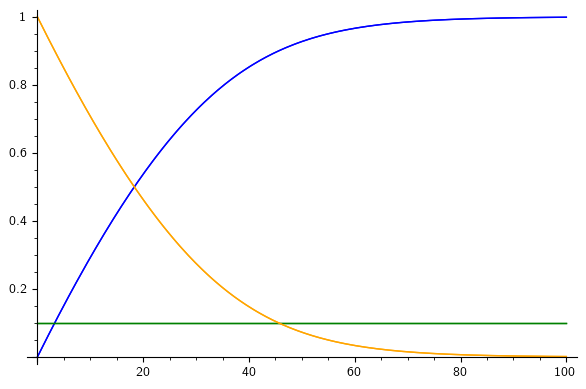

In [43]:
with suppress_stdout():
    plot_proc("[0.1] Em || [1.0] Sm with network UAF2(1.0, 0.1, 0.5, 0)", n=100).show()

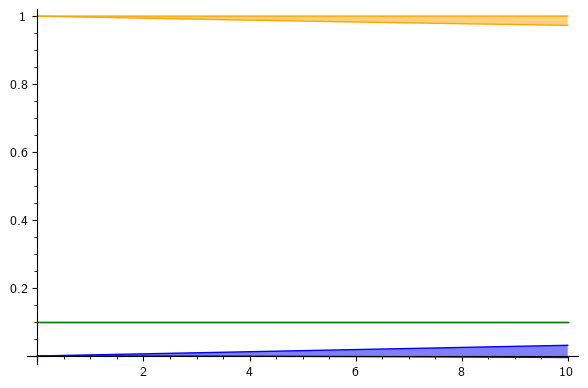

In [46]:
with suppress_stdout():
    plot_proc("[0.1] Em || [1.0] Sm with network UAF2(1.0, 0.1, 0.5, [0.09, 0.1])", n=10).show()

In [47]:
with suppress_stdout():
    p1 = plot_proc("[0.1] E || [1.0] S with network M1(1.0, 0.1, 0.5)", n=10)

In [48]:
with suppress_stdout():
    p2 = plot_proc(
        "[0.1] Em || [1.0] Sm with network UAF2(1.0, 0.1, 0.5, [0, 0.1])", n=10,
        order=10, step=0.05,
        integration_method=IntegrationMethod.NONPOLY_TAYLOR_SYMB,
        max_remainder_queue=500,
    )

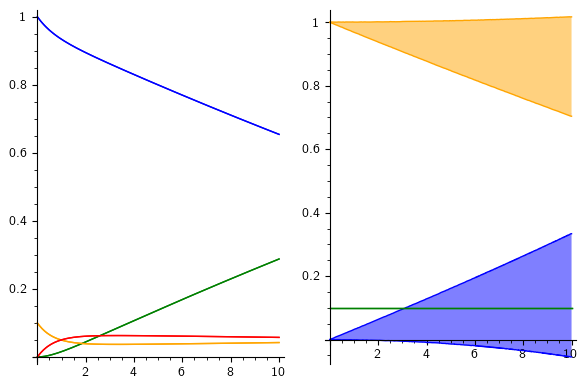

In [49]:
graphics_array([p1, p2], ncols=2)

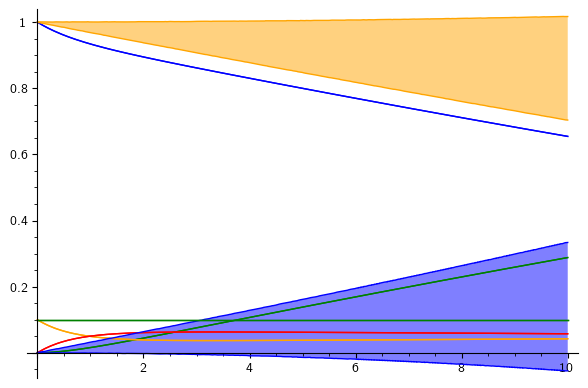

In [50]:
p1 + p2

In [51]:
Pi = "[0.1] E || [1.0] S with network M1(1.0, 0.1, 0.5)"
p = BondProcess(Pi, m)
s = p.as_system
r = s.reach(10, order=10, symbolic_composition=1)

Running cmd: 'savesage "[0.1] E || [1.0] S with network M1(1.0, 0.1, 0.5)" "/tmp/bond-sage-script-_8y0ju8w.py"' ...


PolyObserver(x1, <flowstar.reachability.Reach object at 0x7efb1cf6a700>, 0, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = 0
PolyObserver(x0 + x3, <flowstar.reachability.Reach object at 0x7efb1cf6a700>, 0, symbolic_composition=False, symbolic_composition_order=10, tentative_unpreconditioning=True, mask=None)
fprime = 0


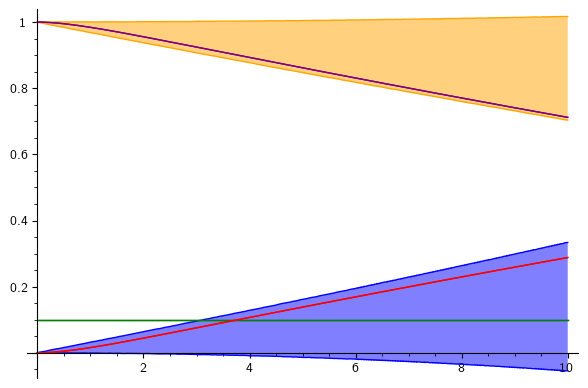

In [52]:
p2 + Atomic(var("P")).sage_plot(r, color_scheme='red')\
   + Atomic(var("S") + var("new 0 in p@0->P | x@0->E")).sage_plot(r, color_scheme='purple')